Importing dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


loading dataset to numpy array

In [2]:
data = np.loadtxt(r"haberman.data",delimiter=",", dtype=float)
# data

preprocessing
standardisation of data within the range (0,1) and deleting the 2nd column of data as said in question

In [3]:
scaled_data = MinMaxScaler()
data_x = scaled_data.fit_transform(data[:,:-1])
data_x = np.delete(data_x, 1, axis =1)

Function that implements knn(k=5)

In [4]:
x, y = data_x, data[:,-1]
#loading the data as features and target classes
l=len(x)

y_pred, y_true = list(), list()     #true labels and predicted labels

x_train, x_test = x[:l-20, :], x[l-20:, :]      #feature data columns
y_train, y_test = y[:l-20], y[l-20:]            #labels

for i in range(len(x_test)):
    distances = np.array([])        #distances calculated to classify for test
    dist = (x_train[:,0]-x_test[i][0])**2 + (x_train[:,1]-x_test[i][1])**2
    distances = (np.append(distances, np.sqrt(dist)))
    idx = np.argsort(distances)
    distances = distances[idx]      #indexes of sorted by distances

    class1, class2 = 0, 0
    for j in idx[0:5]:      #selecting only k-nearest distances/points
        if y_train[j] == 1.0:
            class1 += 1     #no. of points those belong to class 1
        else:
            class2 += 1     #no. of points those belong to class 2
    if class1 > class2:
        y_pred.append(1.)
        y_true.append(y_test[i])
    else:
        y_pred.append(2.)
        y_true.append(y_test[i])
y_pred

[1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

Leave one out cross validation function

In [5]:
x, y = data_x, data[:,-1]
#loading the data as features and target classes

#defining the leave one out cross validation function
def cross_vad_loo(x,y):
    acc = list()    #list to store accuracies

    for k in range(1,min(100, len(x)),2):   #loop over the different values of k
        y_pred, y_true = list(), list()     #true labels and predicted labels
        ix = np.array([*range(0,len(x),1)]) #index labels to perform the loo for different tests

        for i in range(len(x)):             #loop over different tests (306 different test cases assuming each entry is a test case in different instance)
            test_ix = ix[i]                 #test indices
            train_ix = np.delete(ix, i)     #train indices

            x_train, x_test = x[train_ix, :], [x[test_ix, :]]       #feature data columns
            y_train, y_test = y[train_ix], [y[test_ix]]             #labels

            for i in range(len(x_test)):
                distances = np.array([])        #distances calculated to classify for test
                dist = (x_train[:,0]-x_test[i][0])**2 + (x_train[:,1]-x_test[i][1])**2
                distances = (np.append(distances, np.sqrt(dist)))
                idx = np.argsort(distances)
                distances = distances[idx]      #indexes of sorted by distances

                class1, class2 = 0, 0
                for j in idx[0:k]:      #selecting only k-nearest distances/points
                    if y_train[j] == 1.0:
                        class1 += 1     #no. of points those belong to class 1
                    else:
                        class2 += 1     #no. of points those belong to class 2
                if class1 > class2:
                    y_pred.append(1.)
                    y_true.append(y_test[i])
                else:
                    y_pred.append(2.)
                    y_true.append(y_test[i])
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        
        #appending accuracies for k in terms of error
        acc.append([round(np.sum(np.power(np.subtract(y_true, y_pred),2))/len(x), 13), k])
    return acc

Calling leaveoneout cross validation on dataset to find the optimal 'k' and minimum error

In [6]:
acc = cross_vad_loo(x,y)    #returned list with accuracies for k (1,100,2)
k_min = min(acc)[1]         #value of k for least error occured
print(min(acc))

[0.2254901960784, 47]


Plotting 'k' vs error

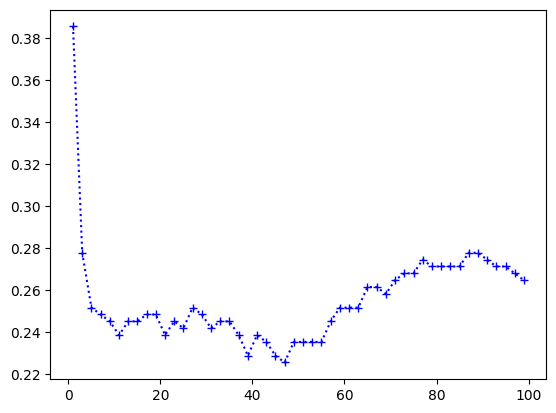

In [7]:
x,y = np.array(acc).T       #plotting the values of error vs k
plt.plot(y,x,linestyle='dotted', marker='+', color='b')

Drawing decision boundary for optimal k 

In [8]:
#defining the function that gives the points to draw the decision boundary for given k
#for the sample data points we have created we will classify them as class 1 or class 2 and then use different markers to plot them
def des_bound(x_train,y_train,x_test_x, x_test_y):
    y_pred = list()
    for i in range(len(x_test_x)):

        distances = np.array([])
        dist = (x_train[:,0]-x_test_x[i])**2 + (x_train[:,1]-x_test_y[i])**2
        distances = (np.append(distances, np.sqrt(dist)))
        idx = np.argsort(distances)
        distances = distances[idx]

        class1, class2 = 0, 0
        for j in idx[0:k_min]:
            if y_train[j] == 1.0:
                class1 += 1
            else:
                class2 += 1
        if class1 > class2:
            y_pred.append(1)
        else:
            y_pred.append(2)
    return y_pred           #returning the predicted class for data points


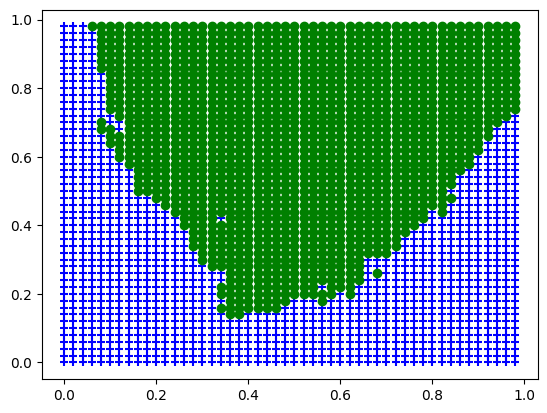

In [9]:
#creating the data points to show the decision boundary (2500 points between (0,0) and (1,1))
test_points_x = list()
test_points_y = list()
for i in range(50):
    for j in range(50):
        test_points_x.append(i/50)
        test_points_y.append(j/50)    

points = des_bound(data_x,data[:,-1],test_points_x,test_points_y)       #des_bound called for created points

xi1, zi1 = list(), list()                       #co-ordinates of class 1
xi2, zi2 = list(), list()                       #co-ordinates of class 2

for i in range(len(test_points_x)):             #appending the co-ordinates
    if(points[i]==1):
        xi1.append(test_points_x[i])
        zi1.append(test_points_y[i])
    else:
        xi2.append(test_points_x[i])
        zi2.append(test_points_y[i])

plt.scatter(xi1, zi1, marker='+', color='b', )    #plotting class 1 points
plt.scatter(xi2, zi2, marker='o', color='g')    #plotting class 2 points


K-fold cross validation function

In [10]:
#defining function validates the test of every fold with its respective train
def cross_vad_kfold(x_train,y_train,x_test,y_test):
    acc = list()
    for k in range(1,100,2):
        y_pred, y_true = list(), list()

        for i in range(len(x_test)):

            distances = np.array([])
            dist = (x_train[:,0]-x_test[i][0])**2 + (x_train[:,1]-x_test[i][2])**2
            distances = (np.append(distances, np.sqrt(dist)))
            idx = np.argsort(distances)
            distances = distances[idx]

            class1, class2 = 0, 0
            for j in idx[0:k]:
                if y_train[j] == 1.0:
                    class1 += 1
                else:
                    class2 += 1
            if class1 > class2:
                y_pred.append(1.)
                y_true.append(y_test[i])
            else:
                y_pred.append(2.)
                y_true.append(y_test[i])
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        acc.append([round(np.sum(np.power(np.subtract(y_true, y_pred),2))/len(x_train), 15), k])

    return acc

Performing 5-fold cross validation for every 5th sample taken as test to find optimal k for that fold

In [11]:
kfoldloocv_acc = list()     #list to store accuracies/error of k-folds
all_indices = list()        #list to store indices so to create train and test for folds

for i in range(5):          #5-fold
    test_indices=list()
    train_indices=list()

    for j in range(len(data)):
        if((i+j)%5==0):                 #as instructed in question creating test and train considering every 5th as test 
            test_indices.append(j)
        else:
            train_indices.append(j)

    all_indices.append(test_indices)
    all_indices.append(train_indices)

    #accuracies returned for all folds with minimum error for k
    kfoldloocv_acc.append(min(cross_vad_kfold(data[train_indices][:,:-1],data[train_indices][:,-1],
                                              data[test_indices][:,:-1],data[test_indices][:,-1])))

true_error = 0
for i in range(5):
    true_error += kfoldloocv_acc[i][0]/5

print(kfoldloocv_acc)
print("True error of all folds: ", true_error)       #true error is the average error of all folds

[[0.073770491803279, 13], [0.085714285714286, 9], [0.069387755102041, 11], [0.044897959183673, 13], [0.048979591836735, 11]]
True error of all folds:  0.0645500167280028


Performing leave one out cross validation on folds from 5-fold cross validation and showing in a table format

In [12]:
kfcv_loo_acc = list()       #list storing accuracies with loo performed on folds

for indice in all_indices:
    kfcv_loo_acc.append(min(cross_vad_loo(data[indice][:,:-1], data[indice][:,-1])))

#printing the values of accuracies of folds
print("|.........|....................|","...................|")
for i in range(0,10,2):
    print("|", "Fold ", int(i/2+1), "|", kfcv_loo_acc[i][0], '{:02d}'.format(kfcv_loo_acc[i][1]), 
          "|", kfcv_loo_acc[i][0], '{:02d}'.format(kfcv_loo_acc[i][1]), "|")
    print("|.........|....................|","...................|")

mean_loo_5f = 0
for i in range(0,10,2):
    mean_loo_5f += (kfcv_loo_acc[i][0] + kfcv_loo_acc[i+1][0])/10

print("\n\nMean error of folds: ", mean_loo_5f)       #true error is the average error of all folds


|.........|....................| ...................|
| Fold  1 | 0.3064516129032 17 | 0.3064516129032 17 |
|.........|....................| ...................|
| Fold  2 | 0.3606557377049 13 | 0.3606557377049 13 |
|.........|....................| ...................|
| Fold  3 | 0.2786885245902 07 | 0.2786885245902 07 |
|.........|....................| ...................|
| Fold  4 | 0.1803278688525 05 | 0.1803278688525 05 |
|.........|....................| ...................|
| Fold  5 | 0.1967213114754 07 | 0.1967213114754 07 |
|.........|....................| ...................|


Mean error of folds:  0.26463311712839
